"SELECT TOP 1000000 gaia_source.source_id,gaia_source.ra,gaia_source.ra_error, \
                               gaia_source.dec,gaia_source.dec_error,gaia_source.parallax,gaia_source.parallax_error, \
                               gaia_source.parallax_over_error,gaia_source.phot_g_mean_mag,gaia_source.bp_rp, \
                               gaia_source.radial_velocity,gaia_source.radial_velocity_error, \
                               gaia_source.phot_variable_flag,gaia_source.teff_val,gaia_source.a_g_val \
            FROM gaiadr2.gaia_source \
            WHERE (gaiadr2.gaia_source.ra>=10.56014098062107 AND gaiadr2.gaia_source.ra<=334.56014098062107 \
               AND gaiadr2.gaia_source.dec>=-75.587831532659646 AND gaiadr2.gaia_source.dec<=89.587831532659646 \
               AND gaiadr2.gaia_source.parallax>=11.468624923468156 AND gaiadr2.gaia_source.parallax<=44.068624923468156 \
               AND gaiadr2.gaia_source.parallax_over_error>=1)"

In [1]:
# import statements
import matplotlib.pyplot as plt
import numpy as np
from astropy.io.votable import parse_single_table
# Import the units package as "u", the constants package as "c"
import astropy.units as u
import astropy.constants as c
from astropy.table import QTable
import astropy.coordinates as coord
from matplotlib import colors
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from astroquery.gaia import Gaia

from matplotlib import colors

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
#Querying methods

def read_gaia_vot(filename):
    return QTable(parse_single_table(filename).to_table())

def get_table_gaia_query(myquery):
    return QTable(Gaia.launch_job_async(myquery, dump_to_file = True).get_results())

In [3]:
#Astronomy methods

def luminosityFromMag(magnitude):
    return ((c.L_bol0).value * 10 ** (-0.4 * (magnitude).value))*u.erg

def distance(parallax):
    parallax_arcsec = parallax.to('arcsec').value
    return 1/parallax_arcsec * u.pc

def Magnitude_absolute_from_apparent(mag,dist):
    M = mag - 5*np.log10(dist.to('pc')/u.pc)*u.mag + 5.*u.mag
    return M

def angle_of_star(x,y,z):
    l=np.arctan2(y,x)
    b=np.arctan(z/np.sqrt(x**2+y**2))
    return l,b

In [4]:
a=input()
print(a)

jack
jack


In [5]:
#Getting the stars between 1.4 and 2 parsecs away and ra between 281 and 310, and dec between 35 and 50

myquery2 = "SELECT TOP 1000000 gaia_source.source_id,gaia_source.ra,gaia_source.ra_error, \
                               gaia_source.dec,gaia_source.dec_error,gaia_source.parallax,gaia_source.parallax_error, \
                               gaia_source.parallax_over_error,gaia_source.phot_g_mean_mag,gaia_source.bp_rp, \
                               gaia_source.radial_velocity,gaia_source.radial_velocity_error, \
                               gaia_source.phot_variable_flag,gaia_source.teff_val,gaia_source.a_g_val \
            FROM gaiadr2.gaia_source \
            WHERE (gaiadr2.gaia_source.ra>=10.56014098062107 AND gaiadr2.gaia_source.ra<=334.56014098062107 \
               AND gaiadr2.gaia_source.dec>=-75.587831532659646 AND gaiadr2.gaia_source.dec<=89.587831532659646 \
               AND gaiadr2.gaia_source.parallax>=11.468624923468156 AND gaiadr2.gaia_source.parallax<=44.068624923468156 \
               AND gaiadr2.gaia_source.parallax_over_error>=1)"

p = read_gaia_vot("K2-18b-result.vot.gz")

p['distance'] = distance(p['parallax'])

p

source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,phot_variable_flag,teff_val,a_g_val,distance
,deg,mas,deg,mas,mas,mas,,mag,mag,km.s**-1,km.s**-1,,K,mag,pc
int64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float64,float64,object,float32,float32,float64
740811768988909696,151.792095048209,0.04713668877925968,29.455673098670932,0.05660417347554553,11.468628191374163,0.06312776298561594,181.6733,9.125900268554688,0.8096933364868164,7.482395066605651,0.19384993839232703,NOT_AVAILABLE,5788.466796875,0.164000004529953,87.1943865746842
5115981321474471680,56.17004897759436,0.10502006002906246,-10.290977627565654,0.09522045028090101,11.468629958171057,0.12378387045381425,92.65044,17.230274200439453,3.166719436645508,nan,nan,NOT_AVAILABLE,nan,nan,87.19437314197498
4559631775012019584,252.2824244718895,0.25390722751660766,17.837872599367657,0.26812902537214517,11.468635849232125,0.39617816730565114,28.948177,14.633511543273926,2.531378746032715,nan,nan,NOT_AVAILABLE,3681.0,0.3075000047683716,87.19432835309304
314637484355364224,14.916997664467157,0.28612032461385273,33.402494773882076,0.27352653777598396,11.468636059825236,0.32853620268140665,34.908287,19.1397705078125,1.0023212432861328,nan,nan,NOT_AVAILABLE,nan,nan,87.19432675198505
4092992099624246528,276.8294074536498,0.8871788357742213,-19.317114600359332,0.8640245977057956,11.468645320338826,1.0599982171745252,10.819495,18.879032135009766,1.7556419372558594,nan,nan,NOT_AVAILABLE,nan,nan,87.19425634574043
4184583170464849664,292.1791046917298,0.06182632820727934,-14.738802905402862,0.05335043204004741,11.468652270619584,0.07360235473933227,155.81909,15.829985618591309,2.669795036315918,nan,nan,NOT_AVAILABLE,3453.5,0.11999999731779099,87.19420350391142
6184118423607844736,195.49586926348758,0.04696816770783313,-30.405954956531033,0.04505770239764297,11.468659831328523,0.058095601361558086,197.41013,14.199496269226074,2.369792938232422,nan,nan,NOT_AVAILABLE,3812.77001953125,0.33469998836517334,87.1941460211712
5908976118479404416,268.21404420891974,1.3369180343942826,-64.68067386628474,2.1694490672026183,11.468660391298522,3.2556047215995996,3.5227435,20.813566207885742,1.164224624633789,nan,nan,NOT_AVAILABLE,nan,nan,87.1941417638208


In [6]:
#Converting the ra, dec, and distance into Sky Coordinates, and then into Galactocentric Coordinates
KeplerSky=coord.SkyCoord(ra=p['ra'],dec=p['dec'],distance=p['distance'])
KeplerGC=KeplerSky.galactocentric
KeplerGC

<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.3 kpc, galcen_v_sun=(11.1, 232.24, 7.25) km / s, z_sun=27.0 pc, roll=0.0 deg): (x, y, z) in pc
    [(-8348.145797  , -16.99376514,  97.65284551),
     (-8357.49074065, -19.73707704, -35.47455328),
     (-8242.27263906,  42.64125062,  76.57009983), ...,
     (-8308.64828732,  15.6578359 ,  40.9448067 ),
     (-8311.29320225,   2.68174844,   7.525004  ),
     (-8300.69725282,  -2.42351223,  49.55020397)]>

In [7]:
#Finding Sky Coordinates of Kepler 452
Kepler452=coord.SkyCoord(ra=172.56014098062107*u.degree,dec=7.587831532659646*u.degree,distance=distance(26.268624923468156*u.mas))

In [8]:
#Converting Kepler 4452 Sky Coordinates into Galactocentric Coordinates
Kepler452G=Kepler452.galactocentric

In [9]:
#Finding the distances between the x,y,z of the stars in our query and Kepler 452's x,y,z
x=(KeplerGC.x-Kepler452G.x)
y=(KeplerGC.y-Kepler452G.y)
z=(KeplerGC.z-Kepler452G.z)

print(x)
print(y)
print(z)

[-43.6530501  -52.99799375  62.22010784 ...  -4.15554042  -6.80045535
   3.79549408] pc
[-0.08692711 -2.83023901 59.54808864 ... 32.56467393 19.58858646
 14.48332579] pc
[ 36.84800126 -96.27939753  15.76525558 ... -19.86003754 -53.27984025
 -11.25464027] pc


In [10]:
#Using our method angle_of_star to solve for L,B in Galactic
L,B=angle_of_star(x,y,z)

In [11]:
#Finding the apparent magnitudes of the stars from the neighboring stars
p['Mg'] = Magnitude_absolute_from_apparent(p['phot_g_mean_mag'], p['distance'])
p['otherDistance'] = np.sqrt(x.value**2+y.value**2+z.value**2)*u.pc
p['m'] = (p['Mg'].value - 5 + 5*np.log10(p['otherDistance'].value))*u.mag

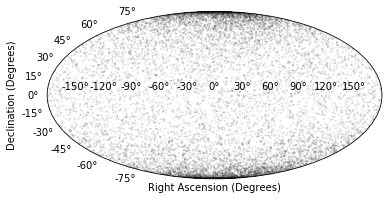

In [12]:
#Plotting the Right Ascension and Declination found previously and adding the new apparent magnitude to get a nice graph
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.subplot(111, projection = "mollweide")

plt.scatter((L.to('degree')).value, (B.to('degree').value), s = 1, c = (p['m']), alpha = 0.1, cmap = "gist_gray_r")
ax.set_facecolor("Black")

plt.xlabel("Right Ascension (Degrees)")
plt.ylabel("Declination (Degrees)")

#plt.xlim(-180,0)
#plt.ylim(-75,75)
plt.show()



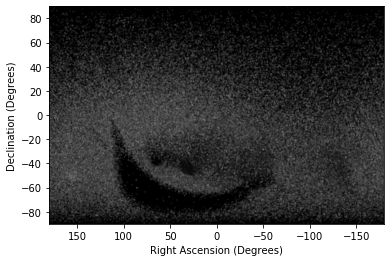

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
#plt.subplot(111, projection = "mollweide") c = (r['m']), alpha = 0.1, cmap = "gray_r"

plt.scatter((L.to('degree')).value, (B.to('degree').value), s = 1, c = (p['m']), alpha = 0.1, cmap = "gray_r")
ax.set_facecolor("Black")

plt.xlabel("Right Ascension (Degrees)")
plt.ylabel("Declination (Degrees)")

plt.xlim(180,-180)
plt.ylim(-90,90)
plt.show()

In [ ]:
len(p)